In [ ]:
import pandas as pd
import os

#os.chdir ('..')


papers = pd.read_csv('metadata.csv',engine='python',encoding='utf-8', error_bad_lines=False)
papers.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [ ]:
#Remove some columns

papers = papers.drop(columns=['mag_id','who_covidence_id', 'arxiv_id','pdf_json_files','pmc_json_files','url','s2_id','sha','cord_uid','source_x','doi','pmcid','pubmed_id','license'], axis=1).sample(100)

papers.head()


,title,abstract,publish_time,authors,journal
19247,Scientific Abstracts,NaN,2011-12-30,NaN,Reprod Sci
245998,Troubleshoot It: Accuracy of Various Thermomet...,NaN,2020,"Crossley, Becky",Biomed Instrum Technol
529545,DetectaWeb-Distress Scale: A Global and Multid...,Emotional disorder symptoms are highly prevale...,2021-02-15,"Piqueras, Jose A.; Garcia-Olcina, Mariola; Riv...",Front Psychol
461936,Importance of inclusion of pregnant and breast...,Investigators are employing unprecedented inno...,2020-04-15,"LaCourse, Sylvia M; John-Stewart, Grace; Adams...",Clin Infect Dis
131191,COVID-19 and Long-Term Care Policy for Older P...,Hong Kong is a major international travel hub ...,2020-05-31,"Lum, Terry; Shi, Cheng; Wong, Gloria; Wong, Kayla",Journal of aging & social policy


In [ ]:
#remove missing values
papers = papers.dropna()
papers.head()

,title,abstract,publish_time,authors,journal
529545,DetectaWeb-Distress Scale: A Global and Multid...,Emotional disorder symptoms are highly prevale...,2021-02-15,"Piqueras, Jose A.; Garcia-Olcina, Mariola; Riv...",Front Psychol
461936,Importance of inclusion of pregnant and breast...,Investigators are employing unprecedented inno...,2020-04-15,"LaCourse, Sylvia M; John-Stewart, Grace; Adams...",Clin Infect Dis
131191,COVID-19 and Long-Term Care Policy for Older P...,Hong Kong is a major international travel hub ...,2020-05-31,"Lum, Terry; Shi, Cheng; Wong, Gloria; Wong, Kayla",Journal of aging & social policy
569656,Public perceptions of non-pharmaceutical inter...,BACKGROUND: Non-pharmaceutical public health i...,2014-06-11,"Teasdale, Emma; Santer, Miriam; Geraghty, Adam...",BMC Public Health
337995,Telling the Truth to Child Cancer Patients in ...,A notable feature of the COVID-19 pandemic is ...,2020,"Gillam, Lynn; Spriggs, Merle; Delany, Clare; C...",J Bioeth Inq


In [ ]:
#Load the regular expression library
import re

#Remove punctuation
papers['abstract'].map(lambda x: re.sub('[,\.!?;()-;:]','',x))
papers['authors'].map(lambda x: re.sub('[,;.-]','',x))
papers['title'].map(lambda x: re.sub('[,(;).-:]','',x))
papers['journal'].map(lambda x: re.sub('[,(;).-:]','',x))


#Convert the abstract to lowercase
papers['abstract'] = papers['abstract'].str.lower()
#papers['abstract'].map(lambda x: x.lower())

papers['abstract'].head()


529545    emotional disorder symptoms are highly prevale...
461936    investigators are employing unprecedented inno...
131191    hong kong is a major international travel hub ...
569656    background: non-pharmaceutical public health i...
337995    a notable feature of the covid-19 pandemic is ...
Name: abstract, dtype: object

In [ ]:
papers.head()

,title,abstract,publish_time,authors,journal
529545,DetectaWeb-Distress Scale: A Global and Multid...,emotional disorder symptoms are highly prevale...,2021-02-15,"Piqueras, Jose A.; Garcia-Olcina, Mariola; Riv...",Front Psychol
461936,Importance of inclusion of pregnant and breast...,investigators are employing unprecedented inno...,2020-04-15,"LaCourse, Sylvia M; John-Stewart, Grace; Adams...",Clin Infect Dis
131191,COVID-19 and Long-Term Care Policy for Older P...,hong kong is a major international travel hub ...,2020-05-31,"Lum, Terry; Shi, Cheng; Wong, Gloria; Wong, Kayla",Journal of aging & social policy
569656,Public perceptions of non-pharmaceutical inter...,background: non-pharmaceutical public health i...,2014-06-11,"Teasdale, Emma; Santer, Miriam; Geraghty, Adam...",BMC Public Health
337995,Telling the Truth to Child Cancer Patients in ...,a notable feature of the covid-19 pandemic is ...,2020,"Gillam, Lynn; Spriggs, Merle; Delany, Clare; C...",J Bioeth Inq


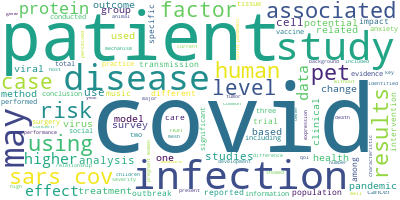

In [ ]:
#Import the wordcloud library

from wordcloud import WordCloud

#Join the different processed abstract together

long_string = ','.join(list(papers['abstract'].values))

#Create a WordCloud object 

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

#Generate a word cloud

wordcloud.generate(long_string)

#Visualize the word cloud

wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from','subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return[[word for word in simple_preprocess(str(doc))if word not in stop_words] for doc in texts]

data = papers.abstract.values.tolist()
data_words = list(sent_to_words(data))

#remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['emotional', 'disorder', 'symptoms', 'highly', 'prevalent', 'common', 'cause', 'disability', 'among', 'children', 'adolescents', 'screening', 'early', 'detection', 'needed', 'identify', 'need', 'help', 'improve', 'treatment', 'outcomes', 'nowadays', 'especially', 'arrival', 'covid', 'outbreak', 'assessment', 'increasingly', 'conducted', 'online']


In [ ]:
import gensim.corpora as corpora

#Create Dictionary
dicword = corpora.Dictionary(data_words)

#Create Corpus
texts = data_words

#Term Document Frequency 

corpus = [dicword.doc2bow(text) for text in texts]

#View

print(corpus[:1][0][:30])

[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 6), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [ ]:
from pprint import pprint

#number of topics
num_topics = 10

#Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dicword, num_topics=num_topics)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"patients" + 0.008*"covid" + 0.005*"study" + 0.005*"disease" + '
  '0.005*"psychiatrists" + 0.005*"technology" + 0.004*"impact" + '
  '0.004*"analysis" + 0.004*"potential" + 0.004*"studies"'),
 (1,
  '0.010*"covid" + 0.006*"care" + 0.005*"children" + 0.005*"risk" + '
  '0.004*"health" + 0.003*"stenosis" + 0.003*"effects" + 0.003*"associated" + '
  '0.003*"may" + 0.003*"vein"'),
 (2,
  '0.011*"covid" + 0.010*"cov" + 0.009*"sars" + 0.008*"disease" + 0.008*"rna" '
  '+ 0.006*"wastewater" + 0.005*"viral" + 0.005*"infection" + 0.005*"based" + '
  '0.004*"study"'),
 (3,
  '0.008*"covid" + 0.007*"pets" + 0.007*"viral" + 0.006*"infection" + '
  '0.005*"host" + 0.005*"related" + 0.004*"may" + 0.004*"iav" + 0.004*"higher" '
  '+ 0.004*"pandemic"'),
 (4,
  '0.011*"covid" + 0.007*"infection" + 0.006*"sars" + 0.005*"levels" + '
  '0.005*"respiratory" + 0.004*"anxiety" + 0.004*"cov" + 0.004*"study" + '
  '0.004*"higher" + 0.004*"related"'),
 (5,
  '0.008*"risk" + 0.007*"infection" + 0.

In [ ]:
import pickle
import pyLDAvis.gensim_models
import pyLDAvis

#Visualize the topics 
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join ('ldavis_prepared _' + str (num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dicword)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
 
#load the pre-prepared pyLDAvis data from disk

with open (LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.019774 -0.062307       1        1  21.475276
4      0.025385 -0.014429       2        1  14.800370
5     -0.007298  0.021146       3        1  12.553069
2      0.015697  0.074345       4        1  11.968424
8     -0.080052  0.013183       5        1   9.443718
3      0.074706 -0.008561       6        1   9.373878
6      0.030891 -0.004977       7        1   7.622008
7     -0.013199  0.003021       8        1   4.937518
0     -0.005626 -0.028734       9        1   4.448575
1     -0.020731  0.007314      10        1   3.377164, topic_info=          Term       Freq      Total Category  logprob  loglift
2599      pets  15.000000  15.000000  Default  30.0000  30.0000
692   patients  36.000000  36.000000  Default  29.0000  29.0000
857      music  13.000000  13.000000  Default  28.0000  28.0000
546        cov  25.000000  25.000000  Default  27.0000  27.0000
200       care  12.000000  12.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
12       based   0.722126  19.352296  Topic10  -5.9778   0.0998
244       sars   0.715759  27.317031  Topic10  -5.9867  -0.2538
644      viral   0.691734  25.001214  Topic10  -6.0208  -0.1993
104    results   0.653280  22.852615  Topic10  -6.0780  -0.1667
508    protein   0.569104  22.981929  Topic10  -6.2159  -0.3103

[690 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2424      5  0.485653          aan
2890      3  0.214895          aat
2890      6  0.429791          aat
1645      4  0.450193   accessible
2679      1  0.512632  accumulated
...     ...       ...          ...
903       3  0.425716        would
903       9  0.425716        would
2366      4  0.309309          yll
2366      5  0.463964          yll
2366      8  0.154655          yll

[1260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 6, 3, 9, 4, 7, 8, 1, 2])